# Árvore de Decisão | Haberman

In [17]:
import numpy as np
import urllib
from sklearn import tree
from sklearn import  model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from IPython.display import display
import pydotplus

In [19]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
raw_data = urllib.request.urlopen(url)

In [20]:
dataset = np.loadtxt(raw_data, delimiter=",")

In [21]:
print(dataset.shape)

(306, 4)


In [22]:
X = dataset[:,0:2]
y = dataset[:,3]

In [23]:
# Holdout 70% treinamento e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=0) 

In [24]:
# Declara a árvore de decisão
clfa = tree.DecisionTreeClassifier(criterion='entropy')

In [25]:
# Treina a árvore de decisão
clfa = clfa.fit(X_train, y_train)

In [26]:
# Imprime os resultados do experimento baseado em holdout
predicted=clfa.predict(X_test)

In [27]:
# calcula a acuracia na base de teste (taxa de acerto)
score=clfa.score(X_test, y_test)

In [28]:
# calcula a matriz de confusao
matrix = confusion_matrix(y_test, predicted)

In [47]:
#F1 Score
from sklearn.metrics import f1_score
f1=f1_score(y_test, predicted, zero_division=1)

In [45]:
#calculo da curva ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted, pos_label=1)
roc_auc=metrics.auc(fpr, tpr)

## Curva ROC

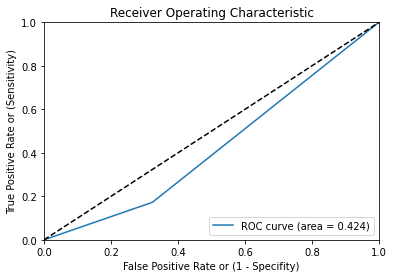

In [44]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right");

## Resultados baseados em Holdout 70/30

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         1.0       0.68      0.83      0.74        58
         2.0       0.52      0.32      0.40        34

    accuracy                           0.64        92
   macro avg       0.60      0.58      0.57        92
weighted avg       0.62      0.64      0.62        92



In [57]:
print("Taxa de acerto = %.2f \n" % score)
print("F1 Score (Positive Class) = %.2f \n" % f1)
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
specificity = tn / (tn+fp)
print("Specificity = %.2f \n" % specificity)
print("Matriz de confusao:")
print(matrix)

Taxa de acerto = 0.64 

F1 Score (Positive Class) = 0.74 

Specificity = 0.83 

Matriz de confusao:
[[48 10]
 [23 11]]
